## Graph geometries comparison

In [1]:
%reset -f 

In [2]:
%pip install ..

Processing /home/sean/Workspaces/contact-networks
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for contact-networks, since package 'wheel' is not installed.
  Attempting uninstall: contact-networks
    Found existing installation: contact-networks 0.1.0
    Uninstalling contact-networks-0.1.0:
      Successfully uninstalled contact-networks-0.1.0
  Running setup.py install for contact-networks ... done
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import Markdown
from contact_networks import graph_metrics, utils

In [4]:
np.seterr(divide='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
data = utils.load_data()

In [6]:
FIG_DIR="../figures/"
TBL_DIR="../tables/"

### Graphing helper-functions

In [7]:
def _hist(ax, xs):
    # histogram
    hist, bins = np.histogram(xs, bins=20)
    widths = np.diff(bins)
    bar = ax.bar(bins[:-1], hist / (hist.sum() * widths), 
                 width=widths, 
                 edgecolor='black', 
                 linewidth=0.5,
                 alpha=0.7)
    
    # hide all except the bottom spine
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    return bar

In [8]:
def _subfig(axes, item, metric):
    axes = axes.ravel()

    _hist(
        axes[0], 
        metric(item['face-to-face'])
    )
    axes[0].set_title(f"Face-to-face network", fontsize=10)

    _hist(
        axes[1], 
        metric(item['co-present'])
    )
    axes[1].set_title(f"Co-presence network", fontsize=10)

In [9]:
def _supfig(data, title, metric=graph_metrics.degree_distribution):
    fig = plt.figure(layout='constrained', figsize=(8,11))
    subfigs = fig.subfigures(6,1, hspace=0.05)

    for subfig, key in zip(subfigs.ravel(), data):
        axes = subfig.subplots(1,2)
        _subfig(axes, data[key], metric)
        subfig.suptitle(f"{key} dataset, |V|={data[key]['face-to-face'].shape[0]}", 
                        fontsize=10, fontweight='bold')

    fig.suptitle(title, fontsize=12, fontweight='bold')
    return fig

### Density

In [10]:
densities = np.zeros((6,3), dtype=object)

idx = 0
for key, item in data.items():
    adj_f2f = item['face-to-face']
    adj_cop = item['co-present']

    densities[idx, :] = [
        key, 
        graph_metrics.density(adj_f2f), 
        graph_metrics.density(adj_cop)
    ]

    idx += 1

In [11]:
table = tabulate(
    densities.tolist(),
    headers=["Dataset", "Face-to-Face", "Co-Present"],
    floatfmt=("", ".3f", ".3f"),
    tablefmt="latex"  # Set the table format to LaTeX
)

with open(os.path.join(TBL_DIR,"proj1_tab1.tex"), "w") as f:
    f.write(table)

table_md = tabulate(
    densities.tolist(),
    headers=["Dataset", "Face-to-Face", "Co-Present"],
    floatfmt=("", ".3f", ".3f"),
    tablefmt="pipe"  # Set the table format to LaTeX
)

display(Markdown(table_md))

| Dataset    |   Face-to-Face |   Co-Present |
|:-----------|---------------:|-------------:|
| Thiers13   |          0.109 |        0.811 |
| InVS13     |          0.180 |        0.877 |
| LyonSchool |          0.285 |        0.912 |
| SFHH       |          0.118 |        0.908 |
| LH10       |          0.406 |        0.525 |
| InVS15     |          0.182 |        0.701 |

### Degree distribution

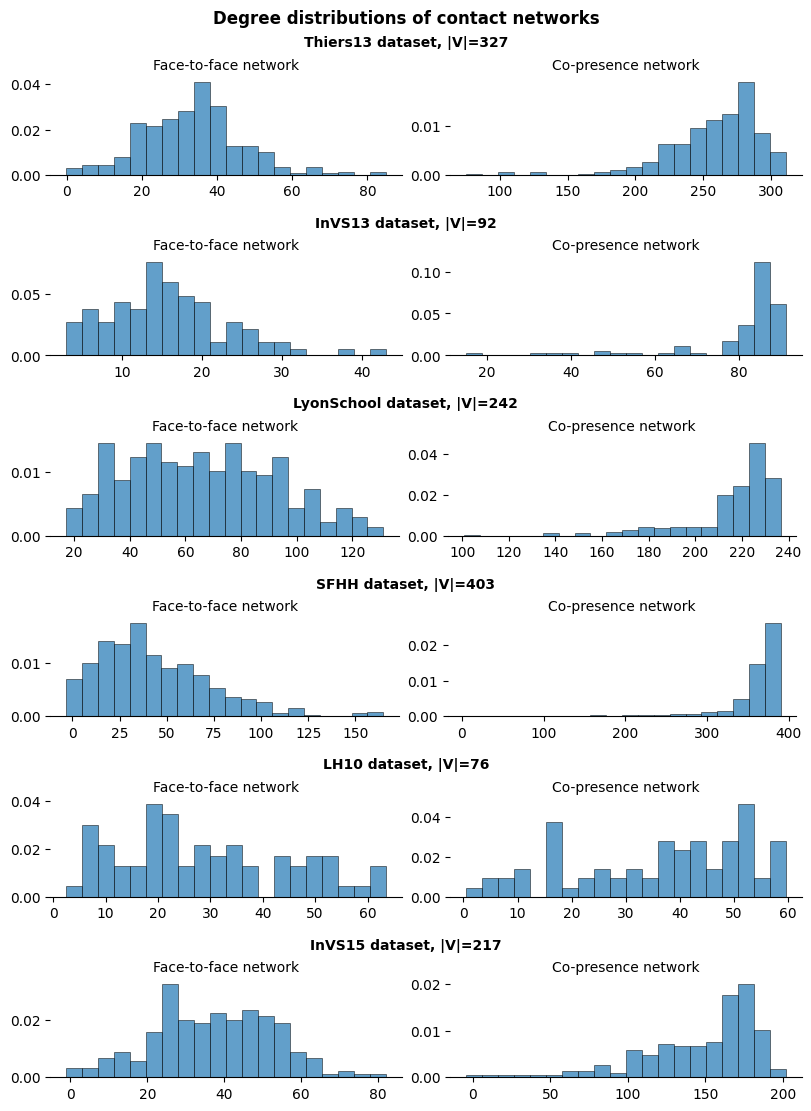

In [12]:
fig = _supfig(data, 
              title='Degree distributions of contact networks',
              metric=graph_metrics.degree_distribution)
fig.savefig(os.path.join(FIG_DIR,"proj1_fig1.png"))
plt.show()

### Average degree

In [13]:
avg_degrees = np.zeros((6,3), dtype=object)

idx = 0
for key, item in data.items():
    adj_f2f = item['face-to-face']
    adj_cop = item['co-present']

    avg_degrees[idx, :] = [
        key, 
        graph_metrics.average_degree(adj_f2f), 
        graph_metrics.average_degree(adj_cop)
    ]

    idx += 1

In [14]:
table = tabulate(
    avg_degrees.tolist(),
    headers=["Dataset", "Face-to-Face", "Co-Present"],
    floatfmt=("", ".2f", ".2f"),
    tablefmt="latex"  # Set the table format to LaTeX
)

with open(os.path.join(TBL_DIR,"proj1_tab2.tex"), "w") as f:
    f.write(table)

table_md = tabulate(
    avg_degrees.tolist(),
    headers=["Dataset", "Face-to-Face", "Co-Present"],
    floatfmt=("", ".2f", ".2f"),
    tablefmt="pipe"  # Set the table format to LaTeX
)

display(Markdown(table_md))

| Dataset    |   Face-to-Face |   Co-Present |
|:-----------|---------------:|-------------:|
| Thiers13   |          35.58 |       265.22 |
| InVS13     |          16.41 |        82.42 |
| LyonSchool |          68.74 |       219.79 |
| SFHH       |          47.47 |       365.05 |
| LH10       |          30.42 |        37.84 |
| InVS15     |          39.39 |       152.74 |

### Clustering coefficient

/home/sean/Workspaces/contact-networks/.venv/lib/python3.10/site-packages/contact_networks/graph_metrics.py:77: RuntimeWarning: invalid value encountered in divide
  coefs = 2 * np.divide(np.diag(triangles), (degs * (degs - 1)))


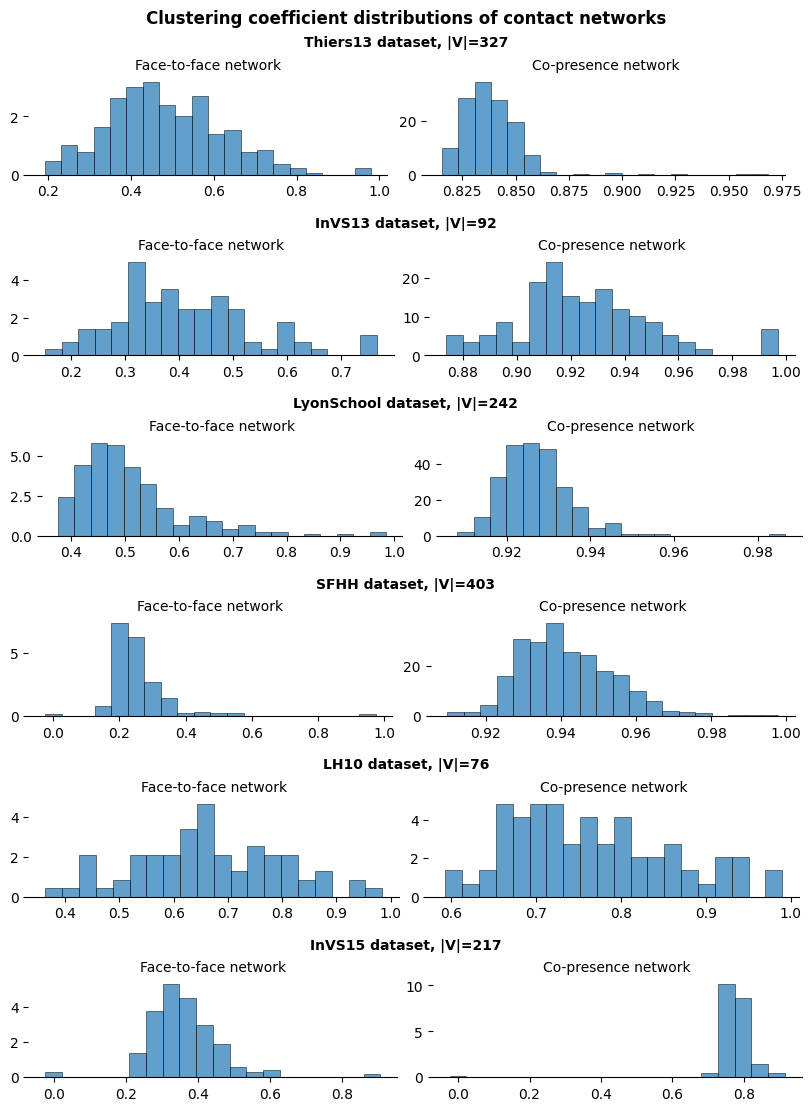

In [15]:
fig = _supfig(data, 
              title='Clustering coefficient distributions of contact networks', 
              metric=graph_metrics.clustering_coefficient)
fig.savefig(os.path.join(FIG_DIR,"proj1_fig2.png"))
plt.show()

### Average clustering coefficient

In [16]:
avg_coefs = np.zeros((6,3), dtype=object)

idx = 0
for key, item in data.items():
    adj_f2f = item['face-to-face']
    adj_cop = item['co-present']

    avg_coefs[idx, :] = [
        key, 
        graph_metrics.average_clustering_coefficient(adj_f2f), 
        graph_metrics.average_clustering_coefficient(adj_cop)
    ]

    idx += 1

In [17]:
table = tabulate(
    avg_coefs.tolist(),
    headers=["Dataset", "Face-to-Face", "Co-Present"],
    floatfmt=("", ".4f", ".3f"),
    tablefmt="latex"  # Set the table format to LaTeX
)

with open(os.path.join(TBL_DIR,"proj1_tab3.tex"), "w") as f:
    f.write(table)

table_md = tabulate(
    avg_coefs.tolist(),
    headers=["Dataset", "Face-to-Face", "Co-Present"],
    floatfmt=("", ".4f", ".3f"),
    tablefmt="pipe"  # Set the table format to LaTeX
)

display(Markdown(table_md))

| Dataset    |   Face-to-Face |   Co-Present |
|:-----------|---------------:|-------------:|
| Thiers13   |         0.5035 |        0.843 |
| InVS13     |         0.4260 |        0.928 |
| LyonSchool |         0.5255 |        0.929 |
| SFHH       |         0.2818 |        0.944 |
| LH10       |         0.6786 |        0.776 |
| InVS15     |         0.3813 |        0.799 |